# Lineage Tracking
This notebook uses the ml-lineage-helper repo to track the lineage of data, code and ML models.

**Note:** The lineage tracking functionality requires the use of [https://github.com/aws-samples/ml-lineage-helper](https://github.com/aws-samples/ml-lineage-helper) repo. This is done by pip installing it directly from it's github repo.

## Imports

In [1]:
from datetime import datetime
from pathlib import Path
import logging
import boto3
import sys
import os

In [2]:
# import from a different path
path = Path(os.path.abspath(os.getcwd()))
package_dir = f'{str(path.parent)}/utils'
print(package_dir)
sys.path.insert(0, package_dir)
import utils

/home/ec2-user/SageMaker/feature-store-expedia/utils


In [3]:

# pip install directly from the github repo for ml-lineage-helper
!pip3 install git+https://github.com/aws-samples/ml-lineage-helper

  Cloning https://github.com/aws-samples/ml-lineage-helper to /tmp/pip-req-build-9o6nsbgc
  Running command git clone --filter=blob:none -q https://github.com/aws-samples/ml-lineage-helper /tmp/pip-req-build-9o6nsbgc
  Resolved https://github.com/aws-samples/ml-lineage-helper to commit 3562fa35a5480e7f0a06c6de55a26407774a9edb
  Preparing metadata (setup.py) ... done


In [4]:
from ml_lineage_helper import MLLineageHelper

## Setup Logging

In [5]:
logger = logging.getLogger('__name__')
logging.basicConfig(format="%(asctime)s,%(filename)s,%(funcName)s,%(lineno)s,%(levelname)s,p%(process)s,%(message)s", level=logging.INFO)       


## Setup Config Variables
Read the metadata (feature group name, model endpoint name etc.) produced by the previous notebooks so that they can be provided as inputs to the lineage tracking module.

In [6]:
endpoint_name = utils.read_param("endpoint_name")
customer_inputs_fg_name = utils.read_param("customer_inputs_fg_name")
destinations_fg_name = utils.read_param("destinations_fg_name")
customer_inputs_fg_query_string = utils.read_param("customer_inputs_fg_query_string")
query_string = utils.read_param("query_string")
training_job_name = utils.read_param("training_job_name")
logger.info(f"endpoint_name={endpoint_name}, customer_inputs_fg_name={customer_inputs_fg_name},\n"
            f"customer_inputs_fg_query_string={customer_inputs_fg_query_string}, training_job_name={training_job_name}")

2022-06-10 15:16:28,656,utils.py,read_param,130,INFO,p10284,read_param, fpath=../config/endpoint_name, read endpoint_name=hotel-cluster-prediction-ml-model-2022-06-08-19-12-46-266
2022-06-10 15:16:28,657,utils.py,read_param,130,INFO,p10284,read_param, fpath=../config/customer_inputs_fg_name, read customer_inputs_fg_name=expedia-customer-inputs-2022-6-8-15-0
2022-06-10 15:16:28,658,utils.py,read_param,130,INFO,p10284,read_param, fpath=../config/destinations_fg_name, read destinations_fg_name=expedia-destinations-2022-6-8-15-0
2022-06-10 15:16:28,659,utils.py,read_param,130,INFO,p10284,read_param, fpath=../config/customer_inputs_fg_query_string, read customer_inputs_fg_query_string=SELECT * FROM "expedia-customer-inputs-2022-6-8-15-0-1654700956" limit 10

2022-06-10 15:16:28,660,utils.py,read_param,130,INFO,p10284,read_param, fpath=../config/training_job_name, read training_job_name=hotel-cluster-prediction-ml-model-2022-06-08-19-02-56-809
2022-06-10 15:16:28,661,<ipython-input-6-5b86116

## Setup lineage tracking

In [7]:
# Model name is same as endpoint name in this example
ml_lineage = MLLineageHelper()
lineage = ml_lineage.create_ml_lineage(training_job_name, 
                                       model_name=endpoint_name,
                                       query=customer_inputs_fg_query_string,
                                       feature_group_names=[customer_inputs_fg_name, destinations_fg_name], 
                                       sagemaker_processing_job_description=None
                                      )

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


Using existing artifact, TrainingData: arn:aws:sagemaker:us-east-1:015469603702:artifact/2bc97ef5ae0934b41a2db75c5f52847a

Using existing artifact, TestingData: arn:aws:sagemaker:us-east-1:015469603702:artifact/aeae9bb46efeee662e4ddf8c3361d67b

code_s3_uri=None, repo_links=None
Using existing artifact, Model: arn:aws:sagemaker:us-east-1:015469603702:artifact/02c7aea7625b6e324d2ff681b2e7d208

Using existing artifact, fg-expedia-customer-inputs-2022-6-8-15-0: arn:aws:sagemaker:us-east-1:015469603702:artifact/cf065612ab2f1afbc7a0ca8b8f09657c

Using existing artifact, fg-expedia-destinations-2022-6-8-15-0: arn:aws:sagemaker:us-east-1:015469603702:artifact/93e85b411a5d6264980623ddc63f4a72

Association already exists between arn:aws:sagemaker:us-east-1:015469603702:artifact/2bc97ef5ae0934b41a2db75c5f52847a and arn:aws:sagemaker:us-east-1:015469603702:experiment-trial-component/hotel-cluster-prediction-ml-model-2022-06-08-19-02-56-809-aws-training-job

Association already exists between arn:a

## Lineage Information
Lineage information is provided both in tabular form and graphical form as shown below.

In [8]:
lineage

,Name/Source,Association,Name/Destination,Artifact Source ARN,Artifact Destination ARN,Source URI,Base64 Feature Store Query String,Git URL
0,hotel-cluster-prediction-ml-model-2022-06-08-1...,Produced,Model,arn:aws:sagemaker:us-east-1:015469603702:exper...,arn:aws:sagemaker:us-east-1:015469603702:artif...,None,None,None
1,TestingData,ContributedTo,hotel-cluster-prediction-ml-model-2022-06-08-1...,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:exper...,s3://expedia-customer-behavior-data-195cbf60/d...,None,None
2,TrainingData,ContributedTo,hotel-cluster-prediction-ml-model-2022-06-08-1...,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:exper...,s3://expedia-customer-behavior-data-195cbf60/d...,U0VMRUNUICogRlJPTSAiZXhwZWRpYS1jdXN0b21lci1pbn...,None
3,fg-expedia-destinations-2022-6-8-15-0,ContributedTo,TestingData,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:featu...,None,None
4,fg-expedia-customer-inputs-2022-6-8-15-0,ContributedTo,TestingData,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:featu...,None,None
5,fg-expedia-destinations-2022-6-8-15-0,ContributedTo,TrainingData,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:featu...,None,None
6,fg-expedia-customer-inputs-2022-6-8-15-0,ContributedTo,TrainingData,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:artif...,arn:aws:sagemaker:us-east-1:015469603702:featu...,None,None


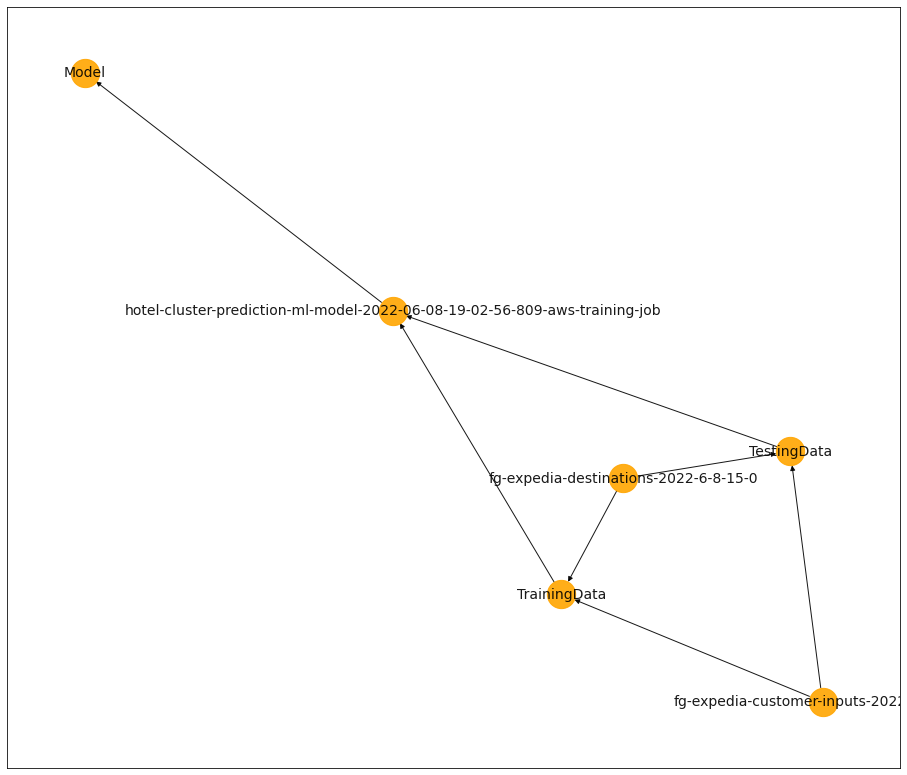

In [9]:
# Visual Representation of the ML Lineage
ml_lineage.graph()